In [1]:
import qiskit
from qiskit import QuantumRegister, ClassicalRegister
import qiskit as qk
from qiskit import QuantumCircuit, Aer, IBMQ, execute
from qiskit import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
from qiskit.extensions import XGate
import math
from math import pi

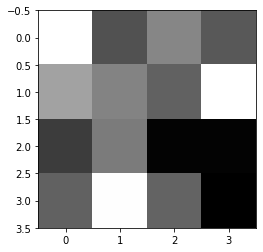

In [2]:
image = np.random.uniform(low=0, high=255, size=(4,4)).astype(int)
plt.imshow(image, cmap = 'gray')
signal = image.flatten()
signal = np.interp(signal, (0, 255), (0, np.pi))

In [3]:
color = QuantumRegister(len(signal), 'color')
classic = ClassicalRegister(color.size, 'classic')

qc = QuantumCircuit(color, classic)

for i, ang in enumerate(signal):
    qc.ry(ang, i)

qc.measure(list(reversed(range(len(signal)))), range(len(signal)))
# qc.draw()

In [4]:
shots = 1000000
aer_sim = Aer.get_backend('aer_simulator')
t_qc_image = transpile(qc, aer_sim)
qobj = assemble(t_qc_image, shots=shots)
job_neqr = aer_sim.run(qobj)
result_neqr = job_neqr.result()
counts_neqr = result_neqr.get_counts()

In [5]:
pixels = np.zeros((len(signal)))
for item in counts_neqr:
    for i, bit in enumerate(item):
        if bit=='0':
            pixels[i]+=counts_neqr[item]

In [6]:
reconstruct = []
for pixel in pixels:
    color = 2*np.arccos((pixel/shots)**(1/2))
    reconstruct.append(color)
    
for rec, real in zip(reconstruct, signal):
    print("reconstructed pixel value = {}, real = {}".format(rec, real))

reconstructed pixel value = 3.12993068371497, real = 3.129272682399245
reconstructed pixel value = 1.1221125148240427, real = 1.121117378339887
reconstructed pixel value = 1.7257638380954494, real = 1.7247959666767492
reconstructed pixel value = 1.194719835524715, real = 1.1950372054831762
reconstructed pixel value = 2.044148020750257, real = 2.0451152176310026
reconstructed pixel value = 1.6884395010256692, real = 1.6878360531051044
reconstructed pixel value = 1.292516561046804, real = 1.2935969750075618
reconstructed pixel value = 3.1297604250015763, real = 3.129272682399245
reconstructed pixel value = 0.8734888489608865, real = 0.8747179545289228
reconstructed pixel value = 1.6008208376304625, real = 1.601596254771267
reconstructed pixel value = 0.20954337865246617, real = 0.20943951023931953
reconstructed pixel value = 0.20910063833824138, real = 0.20943951023931953
reconstructed pixel value = 1.2925498412017975, real = 1.2935969750075618
reconstructed pixel value = 3.1158237431629